In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lg
import seaborn as sbn
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('star_dataset.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
def standardizer(x):
    
    """
        standardize entity-to-feature data matrix by 
          applying Z-scoring, Range standardization and Rank methods
        
        Arguments: 
            x, numpy array, entity-to-feature data matrix
        Returns:
            Z-scored and Range standardized data matrices, x_zscore, x_range, x_rank.
    """
    
    x_ave = np.mean(x, axis=0)
    x_min = np.min(x, axis=0)
    x_rng = np.max(x, axis=0)-np.min(x, axis=0)
    x_std = np.std(x, axis=0)
    x_zscore = np.divide(np.subtract(x, x_ave), x_std)   # Z-scoring standardization/ StandardScaler
    x_range = np.divide(np.subtract(x, x_ave), x_rng)  # Range standardization 
    x_rank = np.divide(np.subtract(x, x_min), x_rng) # Rank standardization 
    return x_zscore, x_range, x_rank

In [22]:
def singular_decomposition(x):
    z, mu, c = lg.svd(x, full_matrices=True)  
    z = -z
    c = -c 
    mu_arg_max = np.argmax(mu)
    
    n_contributions = np.power(mu, 2)
    print("n_contributions: ", n_contributions)

    ds = np.sum(np.power(mu, 2))  # Data Scatter
    print("ds: ", ds)

    # Determine contributions of all the principal components to the data scatter 
    p_contributions = np.divide(n_contributions, ds)
    
    return z, mu, c, ds, n_contributions, p_contributions, mu_arg_max

## Part 1
In your data set, select a subset of 3-6 features related to the same aspect and explain your choice (may be the same subset that was used for k-means clustering)

In [5]:
df.rename(columns={'Temperature (K)': 'Temperature', 'Luminosity(L/Lo)': 'Luminosity', 'Radius(R/Ro)':'Radius',
                  'Absolute magnitude(Mv)':'Absolute magnitude'}, inplace=True)
quantitative_columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude']

X = df[quantitative_columns]
X

,Temperature,Luminosity,Radius,Absolute magnitude
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


## Part 2.

Standardize the selected subset; compute its data scatter and SVD; determine contributions of all the principal components to the data scatter, naturally and per cent

In [6]:
x_zscore, x_range, x_rank = standardizer(x=X)

In [23]:
# Singular decomposition on original data 
z_x, mu_x, c_x, ds_x, n_contributions_x, p_contributions_x, mu_argmax_x = \
singular_decomposition(x=X)
print("SVD")
print("U:", z_x)
print("Sigma:", mu_x)
print("V*:", c_x)

n_contributions:  [1.04701417e+13 3.04145073e+10 4.70629586e+07 2.37951549e+04]
ds:  10500603295793.564
SVD
U: [[ 3.91972718e-05 -1.75769413e-02 -8.99915824e-04 ...  4.32169233e-02
   4.21049371e-02  1.64754571e-01]
 [ 3.88645000e-05 -1.74279859e-02 -8.89844263e-04 ... -1.75505225e-01
  -1.25519068e-01  1.00027540e-02]
 [ 3.32174398e-05 -1.48957226e-02 -7.53627895e-04 ...  7.36611090e-02
   5.94190503e-02  1.88707634e-01]
 ...
 [ 1.66081594e-01  7.68328498e-02 -7.03178257e-02 ... -9.60287711e-01
   2.83796643e-02  1.56399942e-02]
 [ 1.25156666e-01  4.30850083e-02 -5.95435180e-02 ...  2.83465548e-02
  -9.78944404e-01  1.67258531e-02]
 [ 9.15455888e-02 -1.47110341e-01 -1.94199041e-01 ...  1.65308022e-02
   1.66469061e-02 -9.31105108e-01]]
Sigma: [3.23575983e+06 1.74397555e+05 6.86024479e+03 1.54256782e+02]
V*: [[ 4.13398236e-02  9.99143699e-01  1.69918151e-03 -1.90918876e-05]
 [-9.99143144e-01  4.13363114e-02  2.04829346e-03 -3.02725394e-04]
 [-1.97746978e-03  1.78251192e-03 -9.99988764e

In [26]:
# Singular decomposition on Z-Scored standardized data
z_x_zscore, mu_x_zscore, c_x_zscore, ds_x_zscore,\
n_contributions_x_zscore, p_contributions_x_zscore, mu_argmax_x_zscore  = \
singular_decomposition(x=x_zscore)
print("SVD")
print("U:", z_x_zscore)
print("Sigma:", mu_x_zscore)
print("V*:", c_x_zscore)

n_contributions:  [579.43095279 225.60752798  89.56459358  65.39692565]
ds:  959.9999999999997
SVD
U: [[ 0.06132141  0.02284989 -0.01668461 ...  0.01864612  0.0138139
  -0.17797746]
 [ 0.06246649  0.02289292 -0.01710579 ... -0.17109863 -0.12027931
   0.00577292]
 [ 0.06797651  0.02496603 -0.02031495 ... -0.06176361 -0.05318097
  -0.21918571]
 ...
 [-0.13339922  0.09919886 -0.05945816 ... -0.96444296  0.02338664
   0.01509854]
 [-0.10608223  0.07437359 -0.03232511 ...  0.02294347 -0.98285746
   0.00591266]
 [-0.15327085 -0.04132412  0.20715114 ...  0.01446281  0.00600947
  -0.90531603]]
Sigma: [24.07137206 15.02023728  9.46385723  8.08683657]
V*: [[-0.35018343 -0.55933789 -0.47477107  0.58232734]
 [-0.82161262 -0.00452564  0.56898115 -0.03453503]
 [ 0.37607837 -0.75509623  0.53314117 -0.06446119]
 [ 0.24675763  0.34198002  0.40818302  0.80965855]]


In [27]:
# Singular decomposition on Range standardized data
z_x_range, mu_x_range, c_x_range, ds_x_range,\
n_contributions_x_range, p_contributions_x_range,mu_argmax_x_range = \
singular_decomposition(x=x_range)
print("SVD")
print("U:", z_x_range)
print("Sigma:", mu_x_range)
print("V*:", c_x_range)

n_contributions:  [43.65724489 14.67708561  5.7745109   4.3707891 ]
ds:  68.47963049549087
SVD
U: [[ 0.06566131  0.02565575  0.02068869 ...  0.01864612  0.0138139
  -0.17797746]
 [ 0.06735571  0.02584818  0.02427366 ... -0.17109863 -0.12027931
   0.00577292]
 [ 0.07515804  0.02852901  0.03827494 ... -0.06176361 -0.05318097
  -0.21918571]
 ...
 [-0.12373692  0.09462852  0.03597184 ... -0.96444296  0.02338664
   0.01509854]
 [-0.10530785  0.06975847 -0.0080703  ...  0.02294347 -0.98285746
   0.00591266]
 [-0.14378221 -0.03725076  0.25980513 ...  0.01446281  0.00600947
  -0.90531603]]
Sigma: [6.60736293 3.83106847 2.4030212  2.09064323]
V*: [[-0.29874304 -0.39982598 -0.46366863  0.73205408]
 [-0.81632001 -0.03596368  0.5763485   0.01227448]
 [ 0.46959659 -0.01569408  0.65145473  0.59568404]
 [-0.1544451   0.91575078 -0.16864323  0.330313  ]]


In [28]:
# Singular decomposition on Rank standardized data
z_x_rank, mu_x_rank, c_x_rank, ds_x_rank, \
n_contributions_x_rank, p_contributions_x_rank, mu_argmax_x_rank = \
singular_decomposition(x=x_rank)
print("SVD")
print("U:", z_x_rank)
print("Sigma:", mu_x_rank)
print("V*:", c_x_rank)

n_contributions:  [94.83496975 36.67728513 14.22826672  4.61841187]
ds:  150.35893347031083
SVD
U: [[ 0.08623102  0.03685018 -0.03085358 ...  0.0370722   0.03770005
   0.1709604 ]
 [ 0.08767107  0.03759248 -0.03159861 ... -0.17877728 -0.12768141
   0.01040809]
 [ 0.09371058  0.04164006 -0.03644315 ...  0.07046201  0.05906135
   0.18897713]
 ...
 [ 0.02093518 -0.1395772  -0.11346408 ... -0.96095803  0.02867502
   0.01436116]
 [ 0.01696782 -0.11252599 -0.07887478 ...  0.02867547 -0.97867616
   0.01492314]
 [ 0.05139389 -0.19891292 -0.00734302 ...  0.01461407  0.01502313
  -0.92038504]]
Sigma: [9.73832479 6.05617744 3.77203748 2.14904906]
V*: [[ 0.29448451  0.09911757  0.07199447  0.9477718 ]
 [-0.56235793 -0.52845282 -0.57413342  0.27360921]
 [ 0.69253414 -0.05494345 -0.7021478  -0.1560966 ]
 [ 0.342679   -0.84136469  0.41494106 -0.05000475]]


In [29]:
print("Natural contributions of \n",
      "Original data       :", n_contributions_x, "\n",
      "Ranked std data     :", n_contributions_x_rank, "\n",
      "Ranged std data     :", n_contributions_x_range, "\n",
      "Z-Scored std data   :", n_contributions_x_zscore,)

Natural contributions of 
 Original data       : [1.04701417e+13 3.04145073e+10 4.70629586e+07 2.37951549e+04] 
 Ranked std data     : [94.83496975 36.67728513 14.22826672  4.61841187] 
 Ranged std data     : [43.65724489 14.67708561  5.7745109   4.3707891 ] 
 Z-Scored std data   : [579.43095279 225.60752798  89.56459358  65.39692565]


In [30]:
print("Percent contributions of \n",
      "Original data       :\n", 100*p_contributions_x, "\n",
      "Ranked std data     :\n", 100*p_contributions_x_rank, "\n",
      "Ranged std data     :\n", 100*p_contributions_x_range, "\n",
      "Z-Scored std data   :\n", 100*p_contributions_x_zscore,)

Percent contributions of 
 Original data       :
 [9.97099062e+01 2.89645332e-01 4.48192902e-04 2.26607503e-07] 
 Ranked std data     :
 [63.07238789 24.39315329  9.46286755  3.07159127] 
 Ranged std data     :
 [63.75216189 21.43277571  8.43245043  6.38261197] 
 Z-Scored std data   :
 [60.35739092 23.50078416  9.32964516  6.81217975]


In [31]:
print("Data scetter \n",
      "Original data       :", ds_x, "\n",
      "Rank std data     :", ds_x_rank, "\n",
      "Range std data     :", ds_x_range, "\n",
      "Z-Score std data   :", ds_x_zscore,)

Data scetter 
 Original data       : 10500603295793.564 
 Rank std data     : 150.35893347031083 
 Range std data     : 68.47963049549087 
 Z-Score std data   : 959.9999999999997


## Part 3.
Compute and interpret a hidden ranking factor behind the selected features. The factor should be expressed in a 0-100 rank scale (as well as the features – ranking normalization).

In [184]:
def part_3(x, z, c, mu, argmax):    
    z1 = z[:, argmax]  # hiden score
    c1 = c[argmax, :]  # loading
    mu1 = mu[argmax]
    print("c1             :", c1)
    max_val = x.max()
    alpha = 100/np.sum(c1*max_val)
    loading = c1*alpha  
    print("Loading        :", loading)
    ranking_factors = x.dot(c1)
    rank_min = min(ranking_factors)
    rank_max = max(ranking_factors)
    ranking_factors = (ranking_factors - rank_min)/(rank_max - rank_min)
    arg_top5 = np.argsort(ranking_factors)[::-1][:5]
    top_5 = np.sort(ranking_factors,)[::-1][:5]
    
    contribution = 100*mu[0]**2/((x*x).sum().sum())
    print("Contribution: ", contribution)
    
    print("Top5 stars:", top_5)
    return loading, ranking_factors, arg_top5

#### Original data

In [186]:
_, ranking_factors, arg_top5 = part_3(x=X, z=z_x, c=c_x, mu=mu_x, argmax=mu_argmax_x)

c1             : [ 4.13398236e-02  9.99143699e-01  1.69918151e-03 -1.90918876e-05]
Loading        : [ 4.86150946e-06  1.17497999e-04  1.99821535e-07 -2.24518114e-09]
Contribution:  99.7099062480946
Top5 stars: [1.         0.98206935 0.95777161 0.92217711 0.88150324]


In [187]:
df.loc[arg_top5]

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
233,27739,849420.0,1252.0,-7.590,5,Blue-white,B
236,30839,834042.0,1194.0,-10.630,5,Blue,O
101,40000,813000.0,14.0,-6.230,4,Blue,O
227,10930,783930.0,25.0,-6.224,4,Blue,O
229,21738,748890.0,92.0,-7.346,4,Blue,O


#### Z-Scored standardized data

In [188]:
_, ranking_factors, arg_top5 = part_3(x=x_zscore, z=z_x_zscore, c=c_x_zscore, mu=mu_x_zscore, argmax=mu_argmax_x_zscore)

c1             : [-0.35018343 -0.55933789 -0.47477107  0.58232734]
Loading        : [  8.5241555   13.61538772  11.55686453 -14.17499625]
Contribution:  60.35739091573396
Top5 stars: [1.         0.99260288 0.99077519 0.99028511 0.99020983]


In [189]:
df.loc[arg_top5]

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
4,1939,0.000138,0.1030,20.06,0,Red,M
122,3218,0.000540,0.1100,20.02,0,Red,M
128,2856,0.000896,0.0782,19.56,0,Red,M
188,2778,0.000849,0.1120,19.45,0,Red,M
121,3531,0.000930,0.0976,19.94,0,Red,M


#### Range standardized data

In [190]:
_, ranking_factors, arg_top5 = part_3(x=x_range, z=z_x_range, c=c_x_range, mu=mu_x_range, argmax=mu_argmax_x_range)

c1             : [-0.29874304 -0.39982598 -0.46366863  0.73205408]
Loading        : [  47.47235537   63.53513875   73.68018251 -116.32850478]
Contribution:  63.75216188652413
Top5 stars: [1.         0.99361518 0.99111803 0.98913908 0.9883791 ]


In [191]:
df.loc[arg_top5]

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
4,1939,0.000138,0.1030,20.06,0,Red,M
122,3218,0.000540,0.1100,20.02,0,Red,M
121,3531,0.000930,0.0976,19.94,0,Red,M
128,2856,0.000896,0.0782,19.56,0,Red,M
125,3225,0.000760,0.1210,19.63,0,Red,M


#### Rank standardized data

In [192]:
_, _, arg_top5 =\
part_3(x=x_rank, z=z_x_rank, c=c_x_rank, mu=mu_x_rank, argmax=mu_argmax_x_rank)

c1             : [0.29448451 0.09911757 0.07199447 0.9477718 ]
Loading        : [20.83565187  7.01286209  5.09382204 67.057664  ]
Contribution:  63.07238789263821
Top5 stars: [1.         0.99994162 0.98984445 0.9866069  0.98089084]


In [193]:
df.loc[arg_top5]

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
121,3531,0.000930,0.0976,19.94,0,Red,M
122,3218,0.000540,0.1100,20.02,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
125,3225,0.000760,0.1210,19.63,0,Red,M
128,2856,0.000896,0.0782,19.56,0,Red,M


## Part 4.
Visualize the data using two first principal components at the standardization with two versions of normalization: (a) range normalization and (b) z-scoring. At these visualizations, use a distinct shape/color for points representing a pre-specified by you group of objects

In [194]:
df_labeled = pd.read_csv("Stars_with_clusters.csv")

In [195]:
group_0 = np.where(df_labeled["cluster_id_4"] == 0)[0]
print(group_0)

[ 50  51  52  53  54  55  56  57  58  59 110 111 112 113 114 115 116 117
 118 119 170 171 172 174 175 176 177 237 238]


In [196]:
group_1 = np.where(df_labeled["cluster_id_4"] == 1)[0]
print(group_1)

[101 173 179 223 227 229 230 231 232 233 234 235 236 239]


In [197]:
group_2 = np.where(df_labeled["cluster_id_4"] == 2)[0]
print(group_2)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  21  22  23  24  25  26  27  28  29  33  34  35  36  37  38  39
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96
  97 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 151 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 208 209 211 216 219]


In [198]:
group_3 = np.where(df_labeled["cluster_id_4"] == 3)[0]
print(group_3)

[ 20  30  31  32  40  41  42  43  44  45  46  47  48  49  95  98  99 100
 102 103 104 105 106 107 108 109 150 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 178 206 207 210 212 213 214 215 217
 218 220 221 222 224 225 226 228]


In [199]:
len(group_1)+len(group_2)+len(group_3)+len(group_0)

240

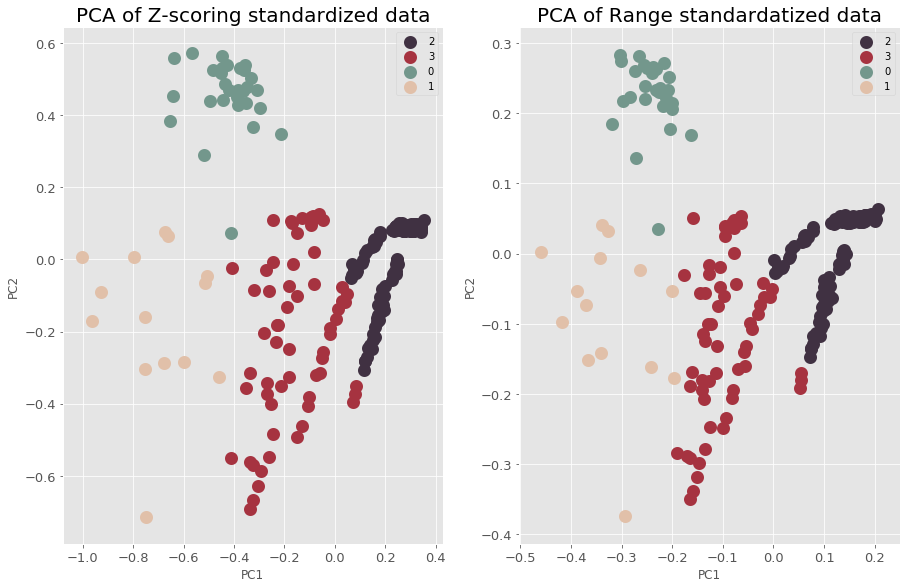

In [210]:
z_z0 = z_x_zscore[:, 0]*np.sqrt(mu_x_zscore[0])
z_z1 = z_x_zscore[:, 1]*np.sqrt(mu_x_zscore[1])

z_r0 = z_x_range[:, 0]*np.sqrt(mu_x_range[0])
z_r1 = z_x_range[:, 1]*np.sqrt(mu_x_range[1])

plt.style.use('ggplot')

fig = plt.figure(figsize=(15, 9.5))

ax = fig.add_subplot(121)
ax.scatter(z_z0[group_2], z_z1[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(z_z0[group_3], z_z1[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(z_z0[group_0], z_z1[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(z_z0[group_1], z_z1[group_1], c='#E1C0A9', linewidths = 7, label ='1')
plt.title("PCA of Z-scoring standardized data", fontsize = 20)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

ax = fig.add_subplot(122)
ax.scatter(z_r0, z_r1)
ax.scatter(z_r0[group_2], z_r1[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(z_r0[group_3], z_r1[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(z_r0[group_0], z_r1[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(z_r0[group_1], z_r1[group_1], c='#E1C0A9', linewidths = 7, label ='1')

plt.legend()

plt.title("PCA of Range standardatized data", fontsize = 20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

In [78]:
# Loadings:
c_x_zscore[:3, :]

array([[-0.35018343, -0.55933789, -0.47477107,  0.58232734],
       [-0.82161262, -0.00452564,  0.56898115, -0.03453503],
       [ 0.37607837, -0.75509623,  0.53314117, -0.06446119]])

- Interpretations should go here

## Part 5. Conventional PCA

#### Conventional PCA

In [204]:
def conventional_pca(X, standardized=False):    
    # Let us name x as original data set, 
    # restricted at selected subset of features, i.e. x_selected.
    if standardized is False:
        mean_x = np.mean(X, axis=0)
        Y = np.subtract(X, mean_x)  # centered version
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)  # Eigenvalues 
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        B_dot = B - la1*np.multiply(c1, c1.T)  # Residual of Cov.
        L_, C_ = np.linalg.eig(B_dot)
        argmax_ = np.argmax(L_)
        la2 = L_[argmax_]
        c2 = C_[:, argmax_]
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    else:
        Y = X
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        la2 = L[sorted_idx[1]]
        c2 = -C[:, sorted_idx[1]]  # unlike np.linalg.svd now we should consider the column
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    
    return pc1, pc2

In [205]:
pc1_x, pc2_x = conventional_pca(X=X, standardized=False)

In [206]:
pc1_x_z, pc2_x_z = conventional_pca(X=x_zscore, standardized=True)

In [207]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcas = pca.fit_transform(x_zscore)
pc1, pc2 = pcas[:, 0], pcas[:, 1]

### Putting it all together

C:\Users\irisc\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


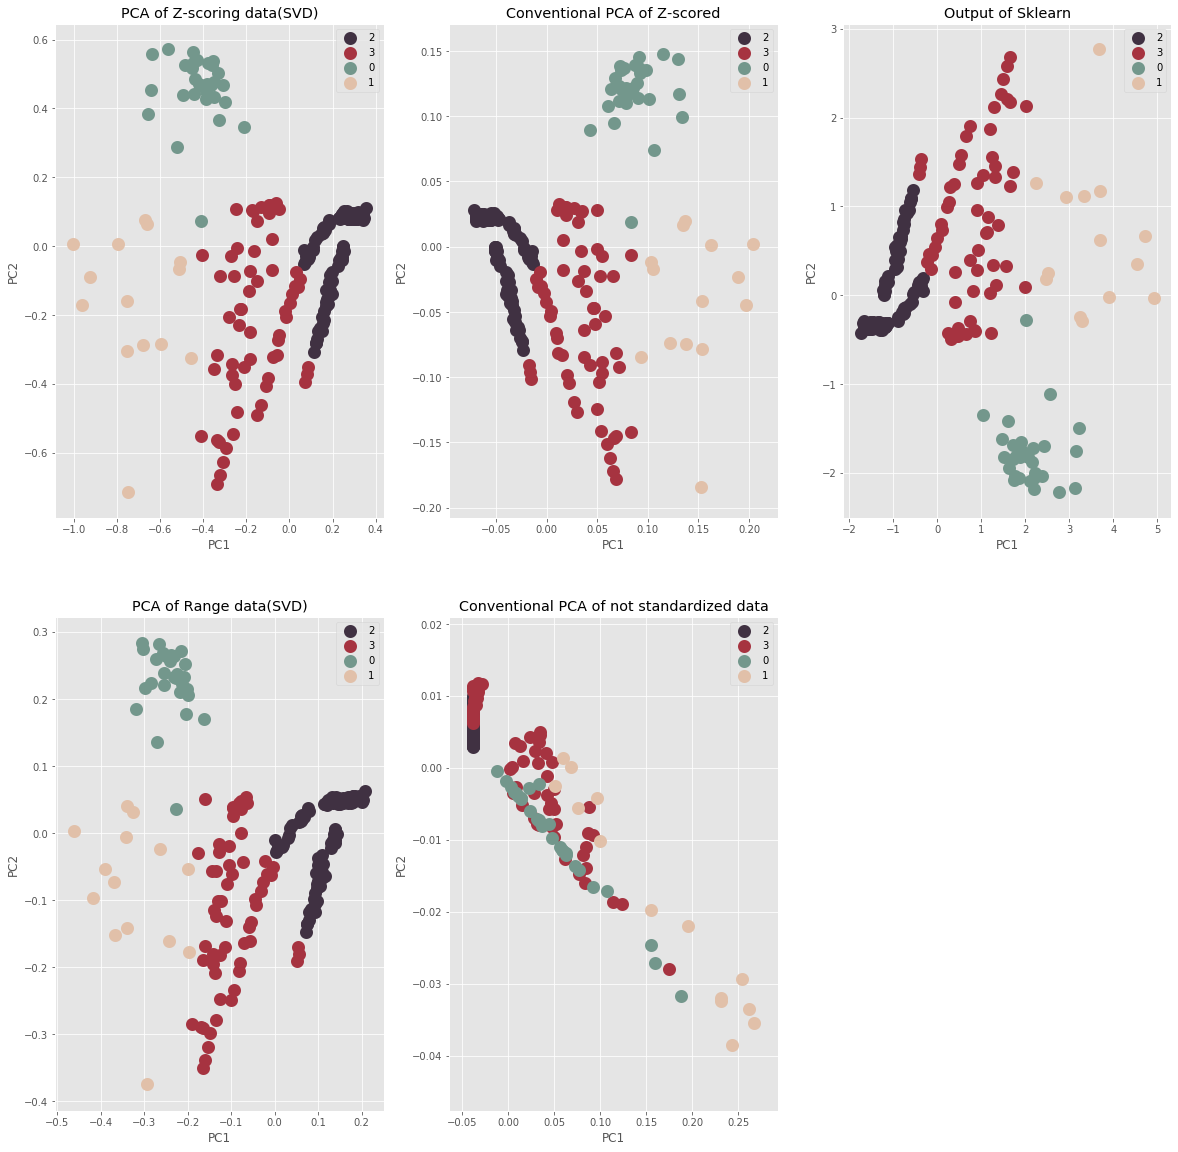

In [211]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(231)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[group_2], z_z1[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(z_z0[group_3], z_z1[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(z_z0[group_0], z_z1[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(z_z0[group_1], z_z1[group_1], c='#E1C0A9', linewidths = 7, label ='1')
plt.title("PCA of Z-scoring data(SVD)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

ax = fig.add_subplot(232)
ax.scatter(pc1_x_z, pc2_x_z)
ax.scatter(pc1_x_z[group_2], pc2_x_z[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(pc1_x_z[group_3], pc2_x_z[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(pc1_x_z[group_0], pc2_x_z[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(pc1_x_z[group_1], pc2_x_z[group_1], c='#E1C0A9', linewidths = 7, label ='1')
plt.title("Conventional PCA of Z-scored")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

ax = fig.add_subplot(233)
ax.scatter(pc1, pc2)
ax.scatter(pc1[group_2], pc2[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(pc1[group_3], pc2[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(pc1[group_0], pc2[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(pc1[group_1], pc2[group_1], c='#E1C0A9', linewidths = 7, label ='1')
plt.title("Output of Sklearn")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

ax = fig.add_subplot(234)
plt.scatter(z_r0, z_r1)
ax.scatter(z_r0[group_2], z_r1[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(z_r0[group_3], z_r1[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(z_r0[group_0], z_r1[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(z_r0[group_1], z_r1[group_1], c='#E1C0A9', linewidths = 7, label ='1')
plt.title("PCA of Range data(SVD)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

ax = fig.add_subplot(235)
ax.scatter(pc1_x, pc2_x)
ax.scatter(pc1_x[group_2], pc2_x[group_2], c='#403142', linewidths = 7, label ='2')
ax.scatter(pc1_x[group_3], pc2_x[group_3], c='#A63340', linewidths = 7, label ='3')
ax.scatter(pc1_x[group_0], pc2_x[group_0], c='#73978C', linewidths = 7, label='0')
ax.scatter(pc1_x[group_1], pc2_x[group_1], c='#E1C0A9', linewidths = 7, label ='1')
plt.title("Conventional PCA of not standardized data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.show()